# **Conjunto de dados de vendas de videogames** <p>
Dados de vendas e classificações de jogos de videogame extraídos do VzCharts

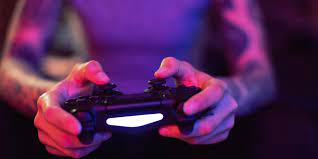

Baixar os Dados
[Link da Kaggle para baixar os Dados](https://www.kaggle.com/sidtwr/videogames-sales-dataset?datasetId=189386&sortBy=voteCount) <p>
Utilizar o arquivo: "PS4_GamesSales.csv

## Analisando Dados

### Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Analisando Dados/DataBase/PS4_GamesSales.csv', encoding= 'latin-1')
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
df.shape

(1034, 9)

#### NA's 

In [4]:
df.isna().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [5]:
df.dropna(inplace= True)

#### Estatisticas

In [6]:
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


### Analises Gráficas

##### <h2><b>Vendas Globais</b></h2>

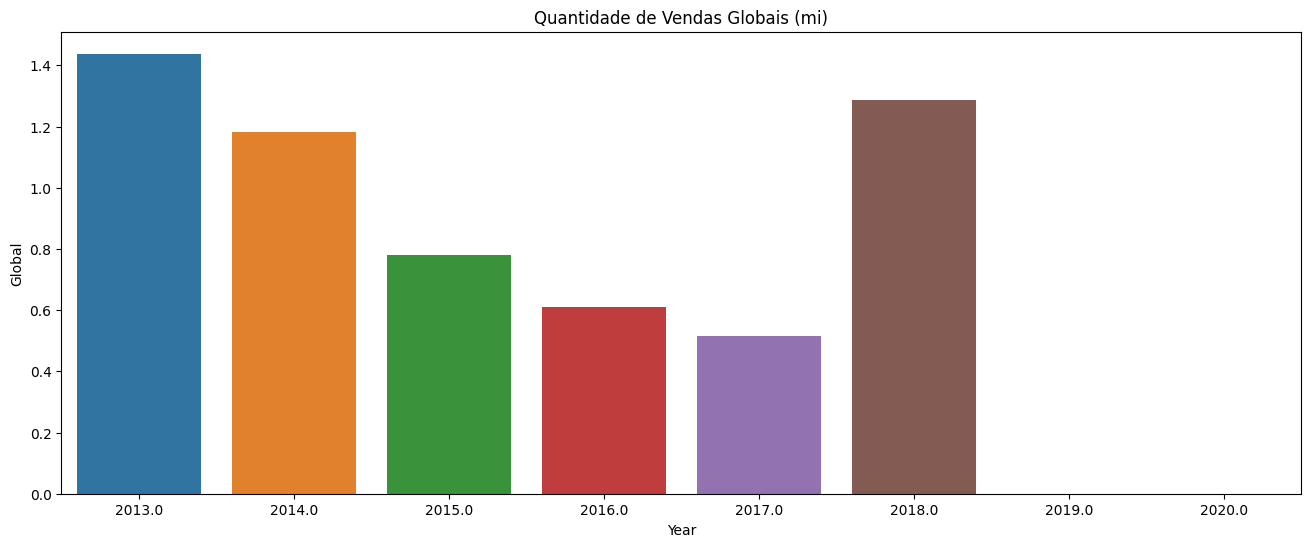

In [7]:
plt.figure(figsize=(16,6))
plt.title('Quantidade de Vendas Globais (mi)')
sns.barplot(data=df, x='Year', y='Global', ci= None);

In [8]:
df1 = df.copy()
df1 = df1.loc[df['Year'] < 2019]
df1.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


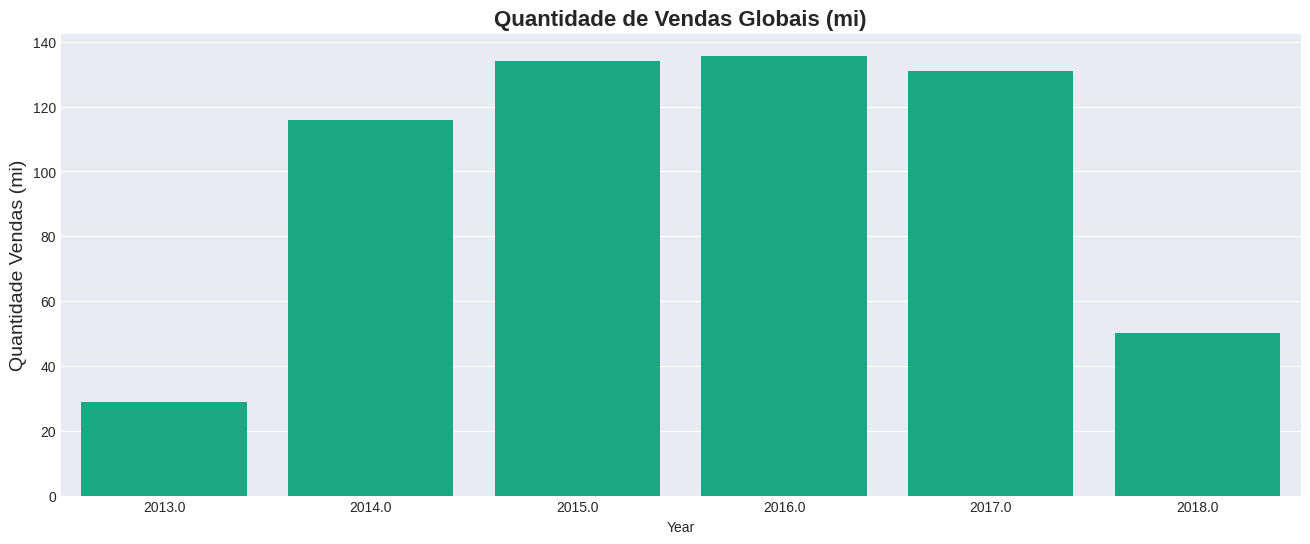

In [9]:
# Retirando os anos nulos
plt.figure(figsize=(16,6))
plt.style.use('seaborn-darkgrid')
plt.title('Quantidade de Vendas Globais (mi)', fontweight= 'bold', fontsize= 16)
sns.barplot(data=df1, x='Year', y='Global', ci= None, estimator= sum, color= '#00c090')
plt.ylabel('Quantidade Vendas (mi)', fontsize= 14);

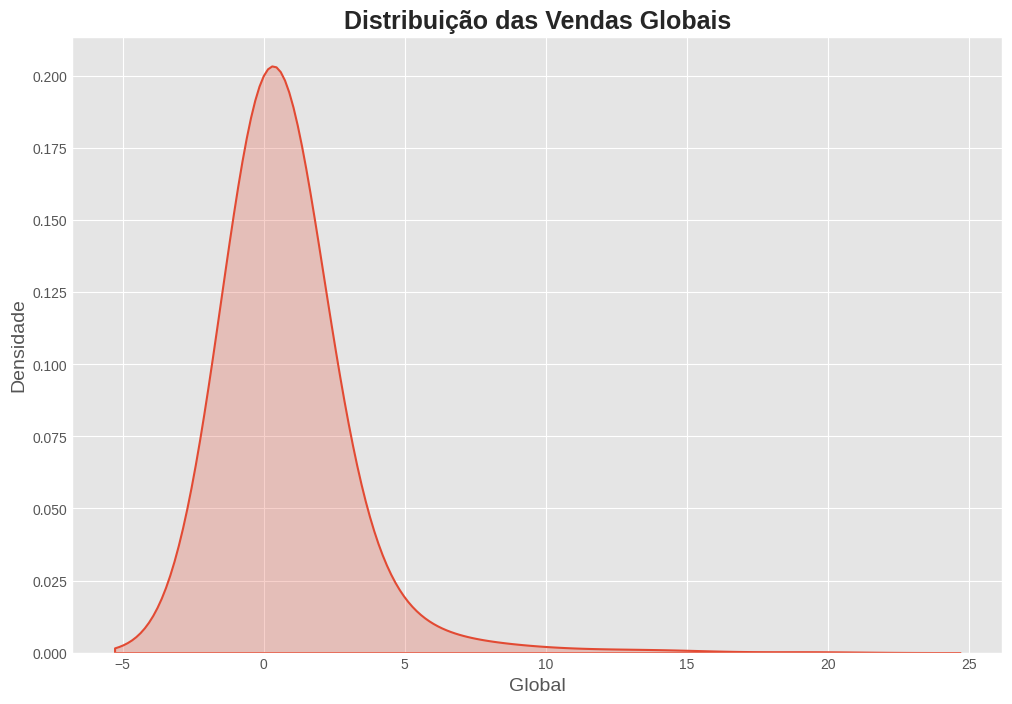

In [10]:
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')

plt.title('Distribuição das Vendas Globais', fontweight= 'bold', fontsize= 18)
plt.ylabel('Densidade', fontsize= 14)
plt.xlabel('Global', fontsize= 14)

sns.kdeplot(df1['Global'], shade= True, bw= 1, linewidth= 1.5);

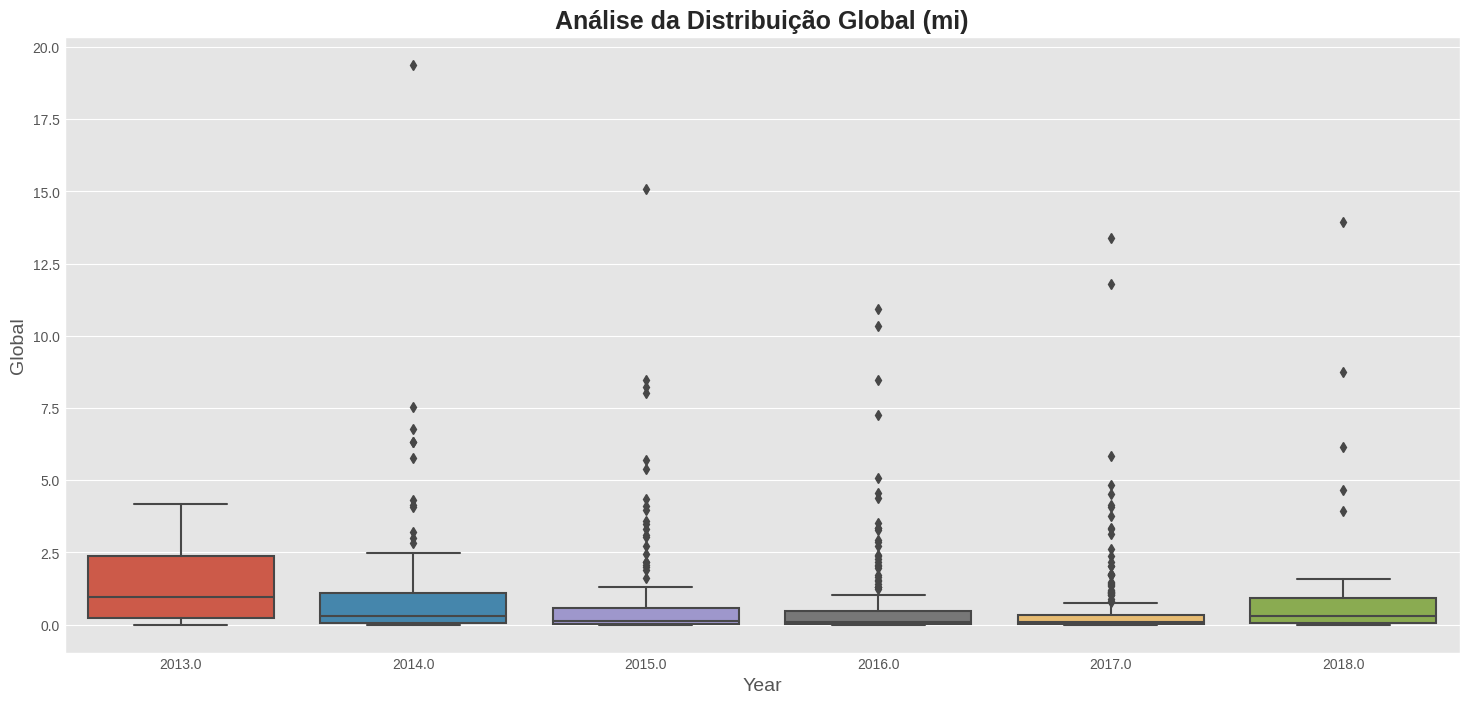

In [11]:
plt.figure(figsize= (18, 8))
plt.title('Análise da Distribuição Global (mi)', fontweight= 'bold', fontsize= 18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global', fontsize= 14)

sns.boxplot(data= df1, x='Year', y='Global');

In [12]:
# TOP 10 Games vendidos no Mundo
df1.query("Global >= 5").sort_values('Global', ascending= False)[['Genre', 'Year', 'Game', 'Publisher', 'Global']].head(10)

,Genre,Year,Game,Publisher,Global
0,Action,2014.0,Grand Theft Auto V,Rockstar Games,19.39
1,Shooter,2015.0,Call of Duty: Black Ops 3,Activision,15.09
2,Action-Adventure,2018.0,Red Dead Redemption 2,Rockstar Games,13.94
3,Shooter,2017.0,Call of Duty: WWII,Activision,13.40
4,Sports,2017.0,FIFA 18,EA Sports,11.80
5,Sports,2016.0,FIFA 17,Electronic Arts,10.94
6,Action,2016.0,Uncharted (PS4),Sony Interactive Entertainment,10.33
7,Action-Adventure,2018.0,Spider-Man (PS4),Sony Interactive Entertainment,8.76
8,Shooter,2016.0,Call of Duty: Infinite Warfare,Activision,8.48
9,Role-Playing,2015.0,Fallout 4,Bethesda Softworks,8.48


##### <h2><b>Distribuição por Continente</b></h2>

In [13]:
df2 = df1.copy()
df2 = df2.groupby('Year').sum().reset_index()
df2

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


In [14]:
df2 = (
    df2
    .assign(
        perc_america = lambda df: round((df['North America'] / df['Global']) * 100, 2),
        perc_europe  = lambda df: round((df['Europe'] / df['Global']) * 100, 2),
        perc_japan   = lambda df: round((df['Japan'] / df['Global']) * 100, 2),
        perc_rest    = lambda df: round((df['Rest of World'] / df['Global']) * 100, 2)
    )
).filter(['Year', 'perc_america', 'perc_europe', 'perc_japan', 'perc_rest', 'Global'])

df2

,Year,perc_america,perc_europe,perc_japan,perc_rest,Global
0,2013.0,35.99,44.78,3.37,15.89,28.76
1,2014.0,34.35,46.72,3.09,15.79,115.85
2,2015.0,37.02,41.95,5.43,15.58,133.99
3,2016.0,34.92,42.72,7.11,15.26,135.72
4,2017.0,34.20,43.68,6.94,15.19,130.90
5,2018.0,39.14,37.25,8.23,15.32,50.20


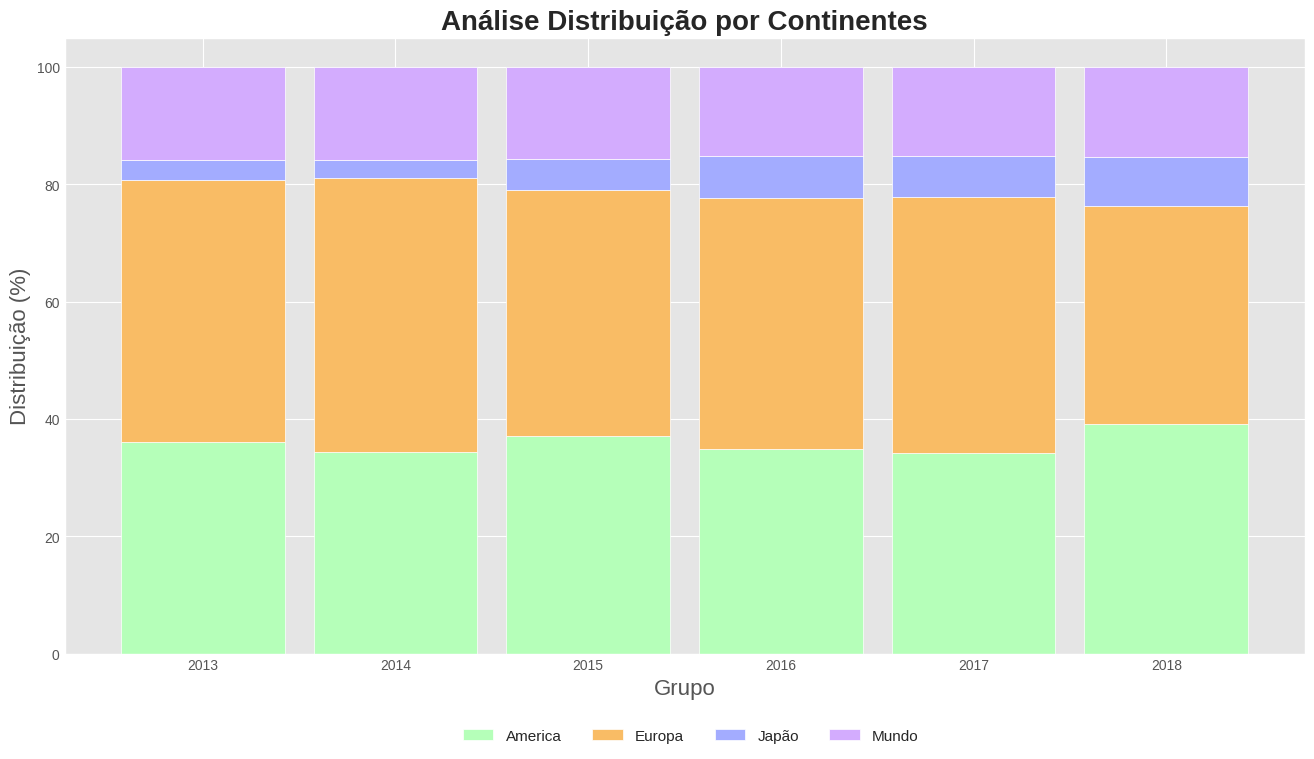

In [15]:
# Graph size
plt.figure(figsize=(16,8))
largura_barra = 0.85

# Data
grupos = df2['Year']
america = df2['perc_america']
europe = df2['perc_europe']
japan = df2['perc_japan']
rest_world = df2['perc_rest']

# Plot America
plt.bar(grupos, america, width= largura_barra, color='#b5ffb9', edgecolor='white')

# Plot Europa
plt.bar(grupos, europe, width= largura_barra, color= '#f9bc65', edgecolor='white', bottom= america)

# Plot Japan
plt.bar(grupos, japan, width= largura_barra, color= '#a3acff', edgecolor='white', bottom= [A + B for A, B in zip (america, europe)])

# Plot Rest of World
plt.bar(grupos, rest_world, width= largura_barra, color= '#d3acfe', edgecolor='white', bottom= [A + B + C for A, B, C in zip (america, europe, japan)])

# Layout

plt.title('Análise Distribuição por Continentes', fontweight= 'bold', fontsize= 20)
plt.legend(['America', 'Europa', 'Japão', 'Mundo'], bbox_to_anchor=(0.7, -0.1), ncol= 4, fontsize= 11)
plt.ylabel('Distribuição (%)', fontsize=16)
plt.xlabel('Grupo', fontsize=16);

##### <h2><b>Distribuição dos jogos por <font color='yellow'>[Produtores, Generos e Games]</font> Global</b></h2>

In [16]:
from sklearn.preprocessing import LabelEncoder

df3 = df1.copy()

lb = LabelEncoder()

df3['Produtor'] = lb.fit_transform(df3['Publisher'])
df3['Genero'] = lb.fit_transform(df3['Genre'])
df3['Jogo'] = lb.fit_transform(df3['Game'])

df3.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [17]:
paleta_cores = sns.color_palette('husl', 8)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

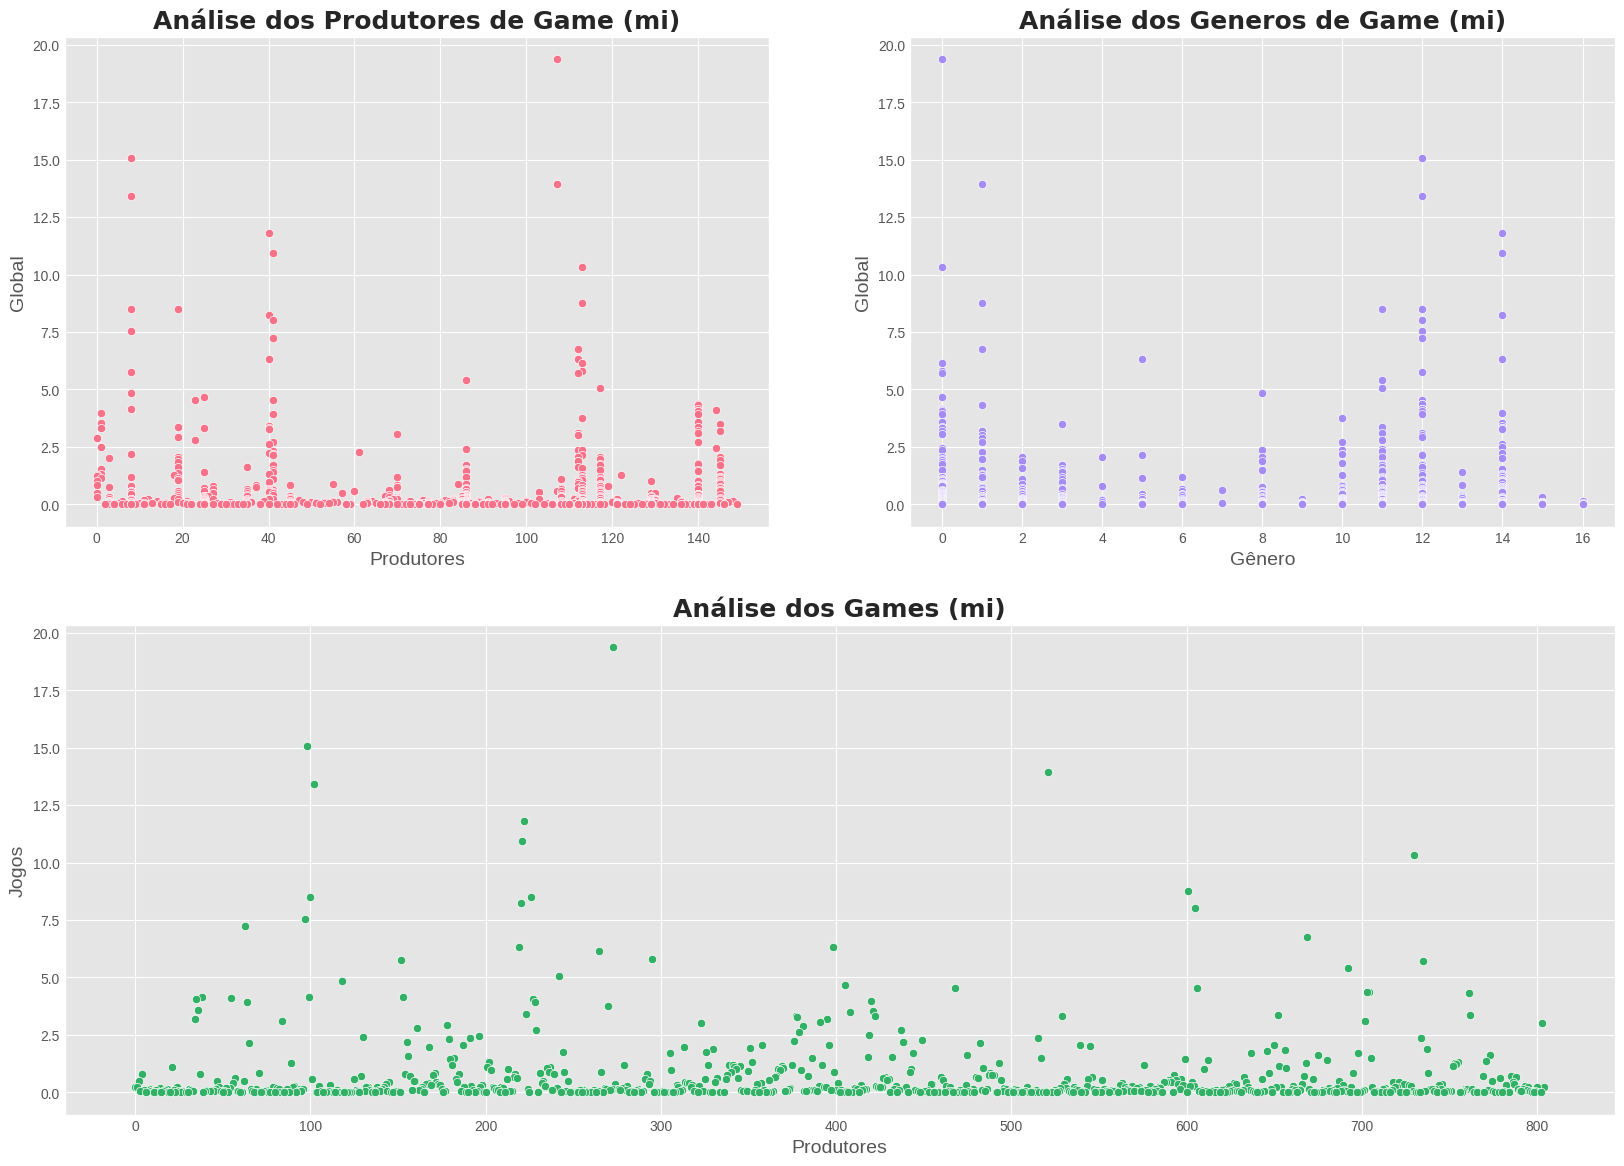

In [18]:
plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
plt.title('Análise dos Produtores de Game (mi)', fontname= "Times New Roman", fontsize= 18, fontweight= 'bold')
sns.scatterplot(data= df3, x='Produtor', y='Global', color= paleta_cores[0])
plt.xlabel('Produtores', fontsize= 14)
plt.ylabel('Global', fontsize= 14)

plt.subplot(2, 2, 2)
plt.title('Análise dos Generos de Game (mi)',fontname= "Times New Roman", fontsize= 18, fontweight= 'bold')
sns.scatterplot(data= df3, x='Genero', y='Global', color= paleta_cores[6])
plt.xlabel('Gênero', fontsize= 14)
plt.ylabel('Global', fontsize= 14)

plt.subplot(2, 2, (3, 4))
plt.title('Análise dos Games (mi)', fontname= "Times New Roman", fontsize= 18, fontweight= 'bold')
sns.scatterplot(data= df3, x='Jogo', y='Global', color= paleta_cores[3])
plt.xlabel('Produtores', fontsize= 14)
plt.ylabel('Jogos', fontsize= 14);

In [19]:
df4 = pd.DataFrame()
df4['Genre'] = df3['Genre'].unique()
df4['Genero'] = df3['Genero'].unique()
df4.sort_values('Genero')

,Genre,Genero
0,Action,0
2,Action-Adventure,1
9,Adventure,2
8,Fighting,3
10,MMO,4
5,Misc,5
12,Music,6
13,Party,7
6,Platform,8
15,Puzzle,9


##### <h2><b>Relatorio das Análises</b></h2>

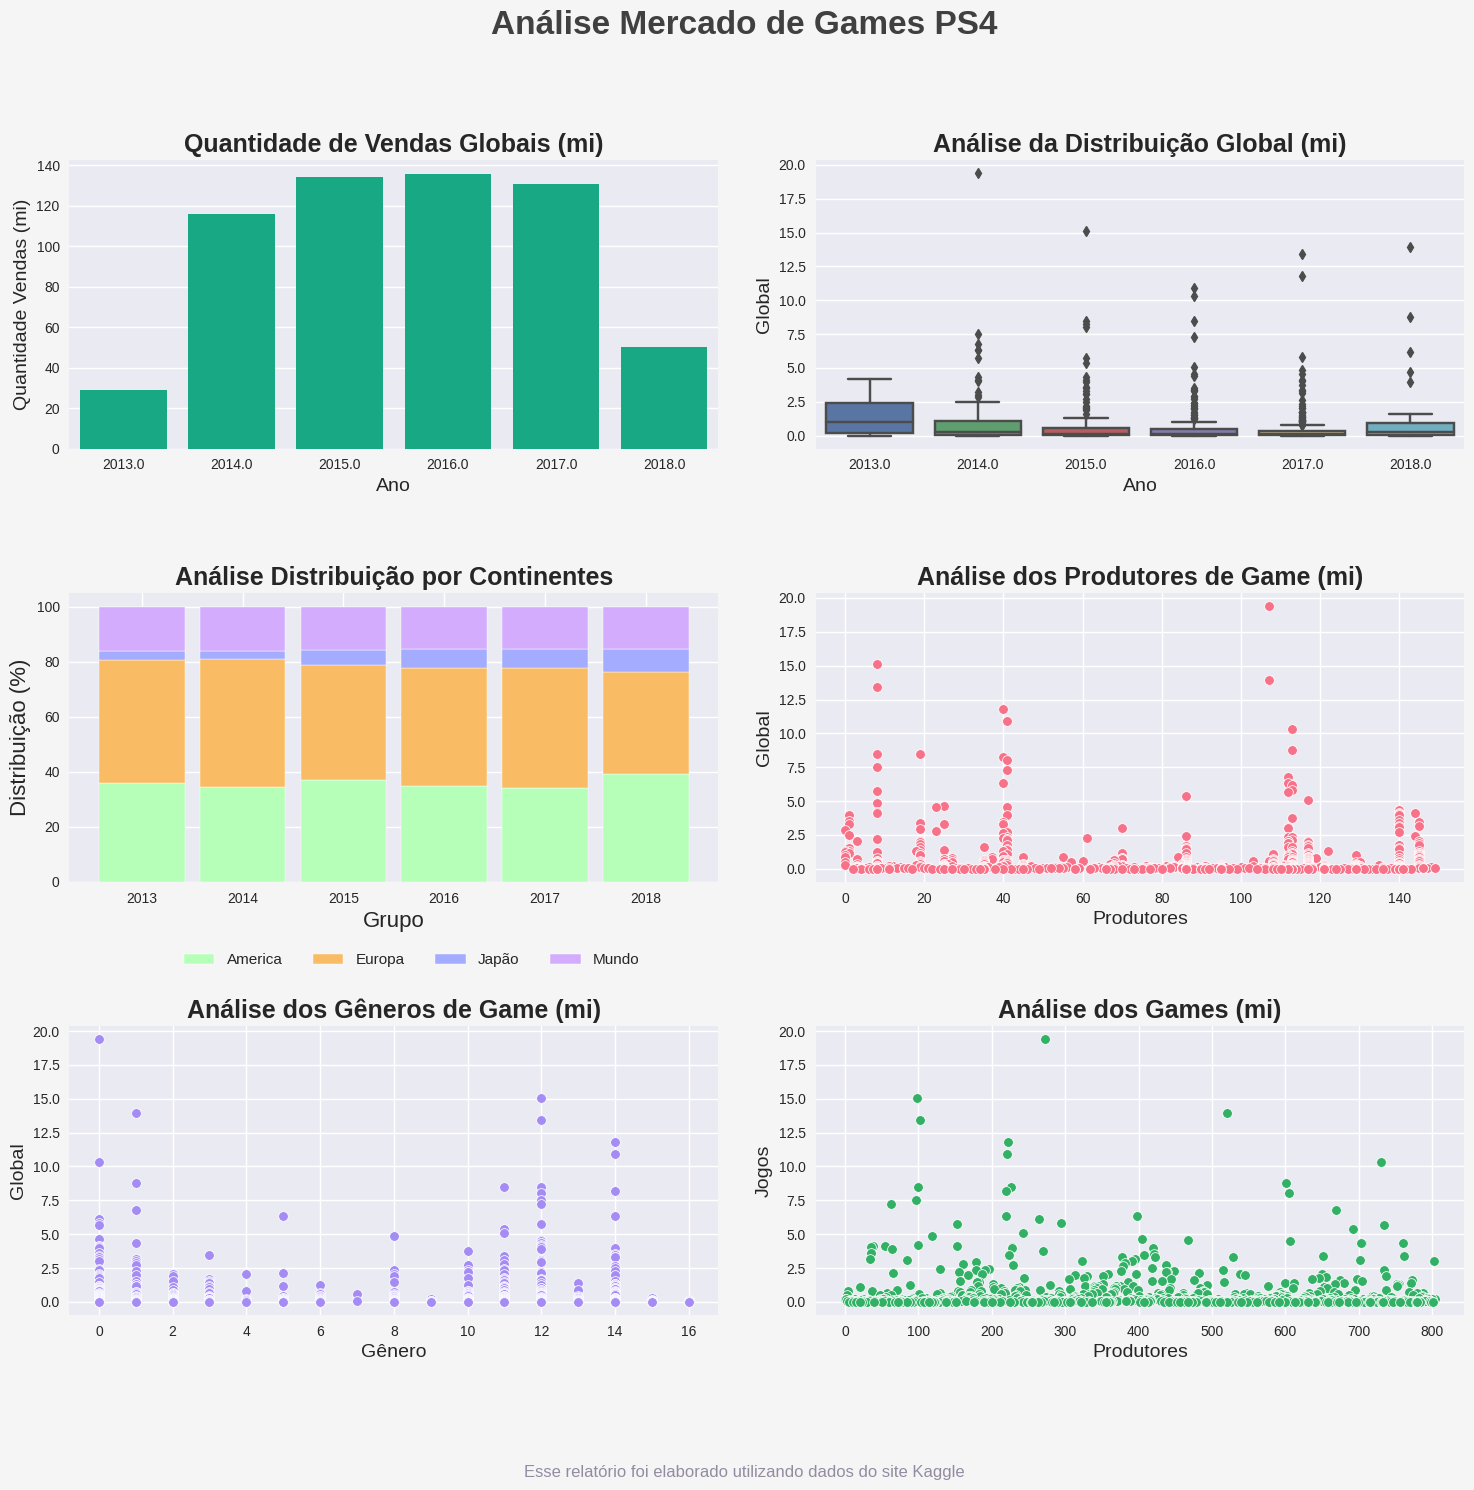

In [20]:
# Tamanho da Imagem
fig, ax = plt.subplots( figsize=(18, 15) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

# Estilo dos gráficos
plt.style.use('seaborn')

# Titulo da figura
plt.suptitle('Análise Mercado de Games PS4', fontsize=24, color='#404040', fontweight='bold' )

                                  # Vendas Globais
plt.subplot(3, 2, 1)
plt.title('Quantidade de Vendas Globais (mi)', fontweight= 'bold', fontsize= 18)
sns.barplot(data=df1, x='Year', y='Global', ci= None, estimator= sum, color= '#00c090')
plt.ylabel('Quantidade Vendas (mi)', fontsize= 14)
plt.xlabel('Ano', fontsize= 14)

                                # Distribuição Global
plt.subplot(3, 2, 2)
plt.title('Análise da Distribuição Global (mi)', fontweight= 'bold', fontsize= 18)
sns.boxplot(data= df1, x='Year', y='Global')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Global', fontsize= 14)

                            # Distribuição por Continentes
plt.subplot(3, 2, 3)
largura_barra = 0.85
# Data
grupos = df2['Year']
america = df2['perc_america']
europe = df2['perc_europe']
japan = df2['perc_japan']
rest_world = df2['perc_rest']
# Plot America
plt.bar(grupos, america, width= largura_barra, color='#b5ffb9', edgecolor='white')
# Plot Europa
plt.bar(grupos, europe, width= largura_barra, color= '#f9bc65', edgecolor='white', bottom= america)
# Plot Japan
plt.bar(grupos, japan, width= largura_barra, color= '#a3acff', edgecolor='white', bottom= [A + B for A, B in zip (america, europe)])
# Plot Rest of World
plt.bar(grupos, rest_world, width= largura_barra, color= '#d3acfe', edgecolor='white', bottom= [A + B + C for A, B, C in zip (america, europe, japan)])
# Layout
plt.title('Análise Distribuição por Continentes', fontweight= 'bold', fontsize= 18)
plt.legend(['America', 'Europa', 'Japão', 'Mundo'], bbox_to_anchor=(0.9, -0.2), ncol= 4, fontsize= 11)
plt.ylabel('Distribuição (%)', fontsize=16)
plt.xlabel('Grupo', fontsize=16)

                                  # Produtores de Game
plt.subplot(3, 2, 4)
plt.title('Análise dos Produtores de Game (mi)', fontsize= 18, fontweight= 'bold')
sns.scatterplot(data= df3, x='Produtor', y='Global', color= paleta_cores[0])
plt.xlabel('Produtores', fontsize= 14)
plt.ylabel('Global', fontsize= 14)

                                  # Gêneros de Game
plt.subplot(3, 2, 5)
plt.title('Análise dos Gêneros de Game (mi)', fontsize= 18, fontweight= 'bold')
sns.scatterplot(data= df3, x='Genero', y='Global', color= paleta_cores[6])
plt.xlabel('Gênero', fontsize= 14)
plt.ylabel('Global', fontsize= 14)

                                # Análise de Game
plt.subplot(3, 2, 6)
plt.title('Análise dos Games (mi)', fontsize= 18, fontweight= 'bold')
sns.scatterplot(data= df3, x='Jogo', y='Global', color= paleta_cores[3])
plt.xlabel('Produtores', fontsize= 14)
plt.ylabel('Jogos', fontsize= 14) 

# Ajustar o layout
plt.subplots_adjust( hspace=0.50, wspace=0.15 );

# Rodapé
Rodape = "Esse relatório foi elaborado utilizando dados do site Kaggle"

# Incluindo o rodape no relatorio
fig.text( 0.5, 0, Rodape, ha='center', va='bottom', size=12, color='#938ca1');